# Capstone Project 2 : Historical Structures Classification

## Part 1 : To develop an intelligent and automated AI model using TensorFlow that can predict the category of a structure in an image

In [ ]:
# Goal: Create a model that can accept images and classify it appropriately as per the structure

In [ ]:
# Import the necessary packages

import tensorflow as tf

In [ ]:
tf.__version__ # Checking the version to be sure of the version being used

'2.17.1'

In [ ]:
# Extract the files - i.e., unzip both training and test archives

!unzip -q /content/dataset_hist_structures.zip -d .   # TRAINING + TEST DATA

In [ ]:
# Preprocessing images --- Goal is to make the data compatible for CNN
# Tensorflow by default offers direct class to achieve preprocessing

# ImageGenerators

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
# create separate Train data and Test data

trainImageData = train_generator.flow_from_directory('/content/dataset_hist_structures/Training_Dataset',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(128,128))

testImageData = test_generator.flow_from_directory('/content/dataset_hist_structures/Test_Dataset',
                                                     batch_size=20, #How many images to pass per tick
                                                     class_mode='categorical', #binary --- Binary Classification | categorical ---- Multi-class classification
                                                     target_size=(128,128))

Found 10543 images belonging to 11 classes.
Found 1522 images belonging to 11 classes.


In [ ]:
#Verification of image size
trainImageData.image_shape

(128, 128, 3)

In [ ]:
#Verification of image size
testImageData.image_shape

(128, 128, 3)

# Part1 - Task 1: Plot the sample images (8–10) from each class or category to gain a better understanding of each class

In [ ]:
# Plot 8 pictures from the different labels

import matplotlib.pyplot as plt
import numpy as np

# Plot sample images
def plot_sample_images(data, num_samples_per_class=8):
    class_indices = data.class_indices
    num_classes = len(class_indices)
    fig, axes = plt.subplots(num_classes, num_samples_per_class, figsize=(num_samples_per_class*2, num_classes*2))

    for class_label, class_index in class_indices.items():
        images_shown = 0
        for i in range(len(data.filepaths)):
            if images_shown >= num_samples_per_class:
                break
            img, label = next(data)
            label_index = np.argmax(label, axis=1)
            if label_index[0] == class_index:
                ax = axes[class_index, images_shown]
                ax.imshow(img[0])
                ax.axis('off')
                if images_shown == 0:
                    ax.set_title(class_label)
                images_shown += 1

    plt.tight_layout()
    plt.show()

# Call the function to plot the images
plot_sample_images(trainImageData)


Output hidden; open in https://colab.research.google.com to view.

# Part1 - Task 2 : Select a CNN architecture of your choice to train the CV model. Configure the architecture for transfer learning, set up a TensorFlow environmentfor the selected backbone architecture, and load pre-trained weights

In [ ]:
#Using VGG19 architecture, without the FC layer

vgg1 = tf.keras.applications.vgg19.VGG19(weights="imagenet",include_top=False,input_shape=(128, 128, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# Part1 - Task 3: Deep learning (transfer learning), use pre-trained CNN weights and freeze all convolutional layers' weights.

In [ ]:
# Locking the pre-trained weights of the vgg19 convolution layer

for layer in vgg1.layers:
  layer.trainable = False

In [ ]:
# create a FC layer for History dataset

#Flatten layers
flatten = tf.keras.layers.Flatten()

#Hidden Layer 1
dense1 = tf.keras.layers.Dense(1000, activation="relu")

#Hidden Layer 2
dense2 = tf.keras.layers.Dense(800,activation="relu")

#Output Layer
output=tf.keras.layers.Dense(11,activation="softmax")

#Create Final Model

model = tf.keras.models.Sequential([
    vgg1,
    flatten,
    dense1,
    dense2,
    output
])

# Part1 - Task 4: As of now, CNN architecture has been configured for our model. Modify the top of this architecture to work with our dataset by:
* Adding an appropriate number of dense layers with an activation function
* Using dropout for regularization.

In [ ]:
# Define the input layer to the created model
input_layer = tf.keras.layers.Input(shape = [128,128,3])
x = vgg1(input_layer)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000,activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(800,activation="relu")(x)
output_layer = tf.keras.layers.Dense(11,activation="softmax")(x)

# Creating the final model
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Evaluating the final model parameters

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1000)                │       8,193,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 800)                 │         800,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │           8,811 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,026,995 (110.73 MB)

 Trainable params: 9,002,611 (34.34 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

# Part1 - Task 5 : Compile the model with the right set of parameters like optimizer, loss function, and metric

In [ ]:
# Compiling the model

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# Part1 - Task 6 : Define your callback class to stop the training once validation accuracy reaches a certain number of your choice

In [ ]:
class MyCLRuleMonitor(tf.keras.callbacks.Callback):
  def __init__(self, CL):
    super(MyCLRuleMonitor).__init__()
    self.CL = CL

  def on_epoch_end(self, epoch, logs=None):
    trainScore = logs["accuracy"]
    testScore = logs["val_accuracy"]

    if testScore > trainScore and testScore >= self.CL:
      self.model.stop_training = True


# Add the checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="./best_model.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Part1 - Task 7 : Setup the train or test dataset directories and review the number of image samples for the train and test datasets for each class

# Part1 - Task 8 : Train the model without augmentation while continuously monitoring the validation accuracy

# Part1 - Task 10 : Train the model with augmentation and keep monitoring validation accuracy

In [ ]:
# Training the model
trainedM=model.fit(trainImageData,
          validation_data=testImageData,
          epochs=200,
          steps_per_epoch=int(len(trainImageData.filenames) / trainImageData.batch_size),
          validation_steps=int(len(testImageData.filenames) / testImageData.batch_size),
          callbacks=[MyCLRuleMonitor(0.9),checkpoint]
          )

Epoch 1/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - accuracy: 0.9550 - loss: 0.1316 - val_accuracy: 0.8362 - val_loss: 0.6141
Epoch 2/200
  1/527 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 1.0000 - loss: 0.0089

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


527/527 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 3/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9650 - loss: 0.0954 - val_accuracy: 0.8421 - val_loss: 0.5998
Epoch 4/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9750 - loss: 0.0706 - val_accuracy: 0.7717 - val_loss: 1.1037
Epoch 6/200
527/527 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.8500 - loss: 0.4104 - val_accuracy: 1.0000 - val_loss: 0.0092


# Part1 - Task 11 : Visualize training and validation accuracy on the y-axis against each epoch on the x-axis to see if the model overfits after a certain epoch

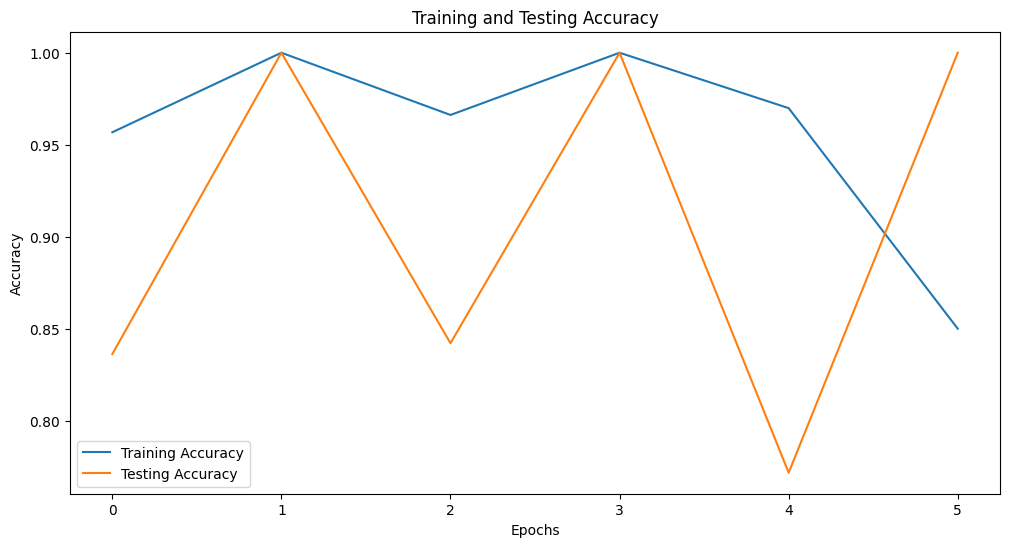

In [ ]:

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.plot(trainedM.history['accuracy'], label='Training Accuracy')
plt.plot(trainedM.history['val_accuracy'], label='Testing Accuracy')

plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


# Part 1 Complete

## Part 2 : To perform exploratory data analysis and develop a recommendation engine that will help tourists visit their places of interest.

# Part 2 - Task 1 : Import all the datasets and perform preliminary inspections, such as:
* Check for missing values and duplicates
* Remove any anomalies found in the data

In [1]:
#import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import datasets

#import Tourist places database xlsx
places_df = pd.read_excel('/content/tourism_with_id.xlsx')

#import ratings database
ratings_df = pd.read_csv('/content/tourism_rating.csv')

#import users database
users_df = pd.read_csv('/content/user.csv')

In [6]:
# data information

print ("the tourist_spot database information is as follows:")
places_df.info()
print()

print ("the rating database information is as follows:")
ratings_df.info()
print()

print ("the user database information is as follows:")
users_df.info()
print()

the tourist_spot database information is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB

the rating database information is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data column

In [7]:
places_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [8]:
# removing the last 2 columns in the places_df as they are not needed
places_df = places_df.iloc[:, :-2]

In [9]:
places_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [14]:
# Check for duplicates in the places_df
#places_df.duplicated().sum()
ratings_df.duplicated().sum()
#users_df.duplicated().sum()

79

In [15]:
#drop the duplicates from ratings_df
ratings_df.drop_duplicates(inplace=True)


In [16]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9921 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        9921 non-null   int64
 1   Place_Id       9921 non-null   int64
 2   Place_Ratings  9921 non-null   int64
dtypes: int64(3)
memory usage: 310.0 KB


# Part 2 - Task 2 : Data Exploration : Explore the user group that provides the tourism ratings

<ipython-input-18-5882a702e020>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')


<Axes: xlabel='Age'>

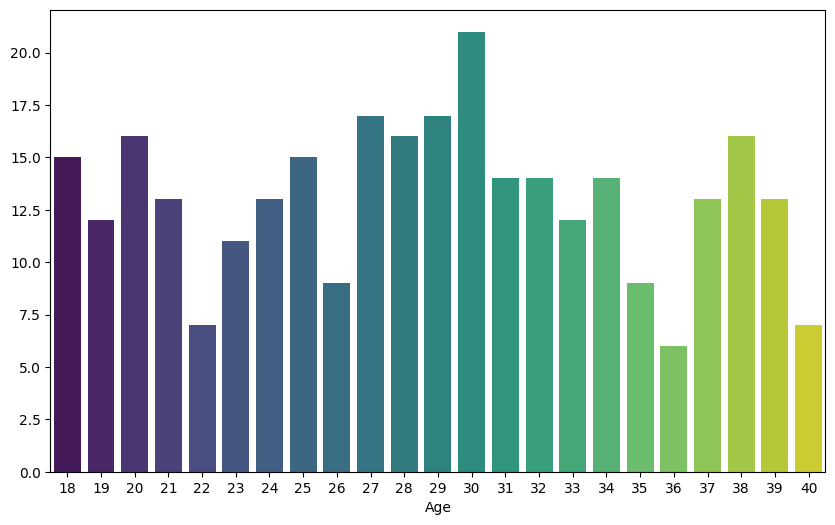

In [18]:
#Analyzing the age distribution of users visiting the places and rating them
age_distribution = users_df['Age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')

<ipython-input-23-7a7e8443137e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_origin.index, y=user_origin.values, palette='viridis')


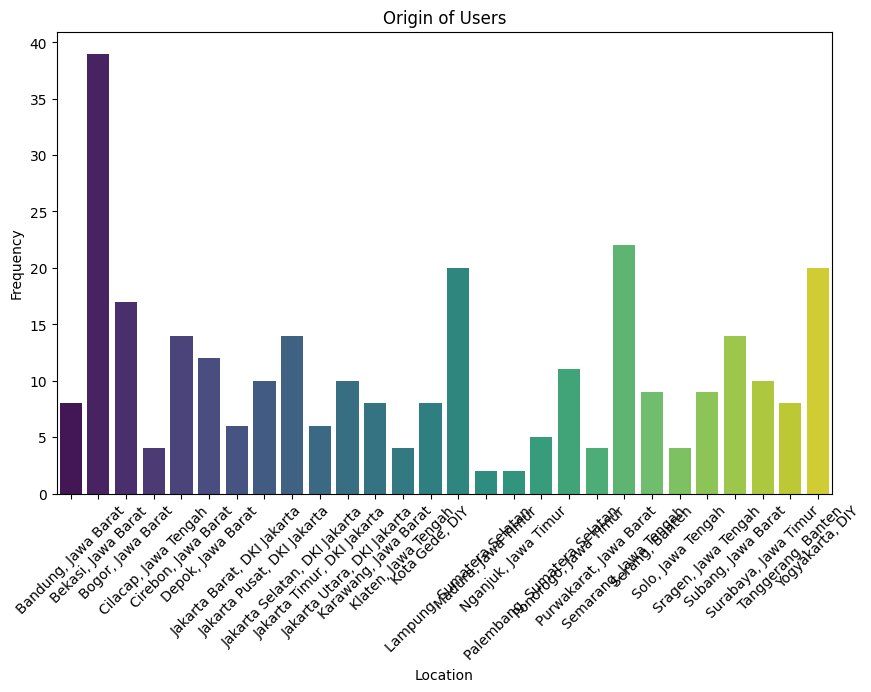

In [23]:
#Analyzing the places where most of these users (tourists) are coming from
user_origin = users_df['Location'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=user_origin.index, y=user_origin.values, palette='viridis')
plt.title('Origin of Users')
plt.xlabel('Location')
plt.ylabel('Frequency')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()


# Part 2 - Task 3 : Explore the locations and categories of tourist spots
* What are the different categories of tourist spots?
* What kind of tourism each location is most famous or suitable for?
* Which city would be best for a nature enthusiast to visit?

In [28]:
# What are the different categories of tourist spots
categories=places_df['Category'].value_counts()
print(f"The Major categories of tourist spots are :\n {categories}")

The Major categories of tourist spots are :
 Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64


In [29]:
# What kind of tourism each location is most famous or suitable for?
tourism_types=places_df.groupby('Place_Name')['Category'].value_counts()
print(f"The Major categories of tourist spots are : \n{tourism_types}")

The Major categories of tourist spots are : 
Place_Name                 Category          
Air Mancur Menari          Taman Hiburan         1
Air Terjun Kali Pancur     Cagar Alam            1
Air Terjun Kedung Pedut    Cagar Alam            1
Air Terjun Semirang        Cagar Alam            1
Air Terjun Sri Gethuk      Cagar Alam            1
                                                ..
Wisata Kraton Jogja        Budaya                1
Wisata Kuliner Pecenongan  Pusat Perbelanjaan    1
Wisata Lereng Kelir        Cagar Alam            1
Wisata Mangrove Tapak      Cagar Alam            1
Wot Batu                   Cagar Alam            1
Name: count, Length: 437, dtype: int64


In [30]:
# Which city would be best for a nature enthusiast to visit
natureRes_df=places_df[places_df['Category']=='Cagar Alam']
city_best_for_nature = natureRes_df['City'].value_counts().idxmax()
print(f"The city best for a nature enthusiast to visit is: {city_best_for_nature}")

The city best for a nature enthusiast to visit is: Bandung


# Part 2 - Task 4 : Create a combined data with places and their user ratings
* Use this data to figure out the spots that are most loved by the tourists. Also, which city has the most loved tourist spots?
* Indonesia provides a wide range of tourist spots ranging from historical and cultural beauties to advanced amusement parks. Among these, which category of places are users liking the most?

In [ ]:
# Creating the merged data set
placeRated_df = pd.merge(places_df, ratings_df, on='Place_Id')
placeRated_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,User_Id,Place_Ratings
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4
1,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,38,2
2,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,64,2
3,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,74,2
4,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,86,4


In [31]:
# Use data to figure out the spots that are most loved by the tourists. Also, which city has the most loved tourist spots?

loved_spots = placeRated_df.groupby('Place_Name')['Rating'].mean().sort_values(ascending=False)
loved_spots.head()


,Rating
Place_Name,
Desa Wisata Sungai Code Jogja Kota,5.0
Wisata Kuliner Pecenongan,5.0
Freedom Library,5.0
Kauman Pakualaman Yogyakarta,5.0
Kebun Tanaman Obat Sari Alam,4.9


In [36]:
city_with_most_loved = placeRated_df.groupby('City')['Rating'].mean().idxmax()
print(f"The city with most favorite tourist spots to visit is: {city_with_most_loved}")

The city with most favorite tourist spots to visit is: Jakarta


In [37]:
# Which category of places are users liking the most?
category_most_loved = placeRated_df.groupby('Category')['Rating'].mean().idxmax()
print(f"The category of places users liking the most is: {category_most_loved}")

The category of places users liking the most is: Tempat Ibadah


In [38]:
# for the sake of clarity, translating the categories as a dictionary

tourist_categories = {
    "Taman Hiburan": "Amusement parks",
    "Budaya": "Culture",
    "Cagar Alam": "Nature preserve",
    "Bahari": "Nautical",
    "Tempat Ibadah": "Worship place",
    "Pusat Perbelanjaan": "Shopping center"
}

In [39]:
print (f"The category of places users liking the most is: {tourist_categories[category_most_loved]}")

The category of places users liking the most is: Worship place


# Part 2 - Task 5 : Develop a recommender system.
* Develop a collaborative filtering model for recommendation and use that to recommend other places to visit using the current tourist location (place name)

In [42]:
# install the necessary modules
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357280 sha256=cbff0d7d90b48bc239c9a86c12cd44bec16d2e61d4fa433ccd52c1c66203cd37
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [52]:
# Import the necessary modules

from surprise import Dataset,Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


# Prepare the data for the recommender system
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['User_Id', 'Place_Id', 'Place_Ratings']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Use SVD for collaborative filtering
model = SVD()
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
accuracy.rmse(predictions)

# Function to recommend places
def recommend_places(User_Id, Place_Id, num_recommendations=5):
    # Get the list of all place IDs
    all_places = ratings_df['Place_Id'].unique()

    # Get the places the user has not rated
    unseen_places = [place for place in all_places if place not in ratings_df[ratings_df['User_Id'] == User_Id]['Place_Id'].values]

    # Predict ratings for unseen places
    predicted_ratings = [(place, model.predict(user_id, place).est) for place in unseen_places]

    # Sort by predicted rating
    recommended_places = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:num_recommendations]

    # Get place names from placerated_df
    recommended_place_ids = [place[0] for place in recommended_places]
    recommended_place_names = placeRated_df[placeRated_df['Place_Id'].isin(recommended_place_ids)]['Place_Name'].values

    return set(recommended_place_names)




RMSE: 1.4146


In [53]:
# Example usage
user_id = 1  # Replace with actual user_id
current_place_id = 101  # Replace with actual current_place_id
recommendations = recommend_places(user_id, current_place_id,5)
print(f"Recommended places to visit: {recommendations}")

Recommended places to visit: {'Pintoe Langit Dahromo', 'Bukit Jamur', 'Puncak Gunung Api Purba - Nglanggeran', 'Keraton Surabaya', 'Monumen Selamat Datang'}


# End of Part 2

THE END